<a href="https://colab.research.google.com/github/plaban1981/WebScrapper/blob/master/Webscrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.google.co.in/search?q=xiaomi&source=lnms&tbm=isch

In [0]:
from bs4 import BeautifulSoup as bs
import os
import json
import urllib.request
import urllib.parse
import urllib.error
from urllib.request import urlretrieve

class ScrapperImage:
    
    ## Create  Image URl
    def createImageUrl(searchterm):
        searchterm=searchterm.split()
        searchterm="+".join(searchterm)
        web_url="https://www.google.co.in/search?q=" + searchterm + "&source=lnms&tbm=isch"
        return web_url
    
   # get Raw HTML
    def scrap_html_data(url,header):
        request=urllib.request.Request(url,headers=header)
        response = urllib.request.urlopen(request)
        responseData = response.read()
        html = bs(responseData, 'html.parser')
        return html
    
    # contains the link for Large original images, type of  image
    def getimageUrlList(rawHtml):
        imageUrlList = []
        for a in rawHtml.find_all("div", {"class": "rg_meta"}):
            link, imageExtension = json.loads(a.text)["ou"], json.loads(a.text)["ity"]
            imageUrlList.append((link, imageExtension))

        print("there are total", len(imageUrlList), "images")
        return imageUrlList
    
    def downloadImagesFromURL(imageUrlList,image_name, header):
        masterListOfImages = []
        count=0
        ###print images
        imageFiles = []
        imageTypes = []
        image_counter=0
        for i, (img, Type) in enumerate(imageUrlList):
            try:
                if (count > 5):
                    break
                else:
                    count = count + 1
                req = urllib.request.Request(img, headers=header)
                try:
                    urllib.request.urlretrieve(img,image_name+str(image_counter)+".jpg")
                    image_counter=image_counter+1
                except Exception as e:
                    print("Image write failed:  ",e)
                    image_counter = image_counter + 1
                respData = urllib.request.urlopen(req)
                raw_img = respData.read()
                # soup = bs(respData, 'html.parser')

                imageFiles.append(raw_img)
                imageTypes.append(Type)

            except Exception as e:
                print("could not load : " + img)
                print(e)
                count = count + 1
        masterListOfImages.append(imageFiles)
        masterListOfImages.append(imageTypes)

        return masterListOfImages
    
    def delete_downloaded_images(self,list_of_images):
        for self.image in list_of_images:
            try:
                os.remove("./static/"+self.image)
            except Exception as e:
                print('error in deleting:  ',e)
        return 0
    
   


## Initialization of ScrapperImage class

In [0]:
imgScrapper = ScrapperImage

## Create search URL

In [0]:
keyWord = 'Giraffe'
url = imgScrapper.createImageUrl(keyWord)
print(url)

https://www.google.co.in/search?q=Giraffe&source=lnms&tbm=isch


## Create Raw HTML

In [0]:
header = {'User-Agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36"}
rawHtml = imgScrapper.scrap_html_data(url, header)

<!DOCTYPE doctype html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><meta content="origin" name="referrer"/><title>Giraffe - Google Search</title><script nonce="AQsqrNz70NSd01+usxHn0Q==">(function(){window.google={kEI:'gIMpXrPjKNqntQbZmrbwDA',kEXPI:'0,1353746,5663,731,223,4727,377,207,2955,249,10,290,761,175,174,178,12,975,179,3,205,73,4,60,690,52,208,10,428,660,155,1128225,143,1197729,295,78,47,39,329079,1294,7105,180,3382,1716,1604,2044,314,893,633,1770,1137,4795,5298,2488,328,5033,10931,279,1191,14056,867,7049,2445,2646,793,845,4693,10213,369,889,2425,5505,3961,1800,512,2111,4858,1362,284,4039,4968,447,2575,2821,1924,3118,7915,1808,1238,738,2044,5766,1,3142,5072,225,2974,873,38,1179,2559,416,4294,2136,1142,2792,448,12,866,12,5,7,5402,620,2884,20,317,235,1746,1192,1344,2778,519,400,2277,8,443,2353,62,823,708,1279,2212,202,1,36,291,149,1103,840,474,43,31
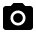
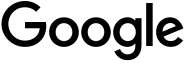
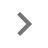
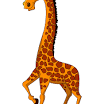
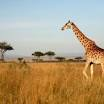
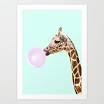
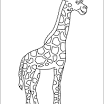
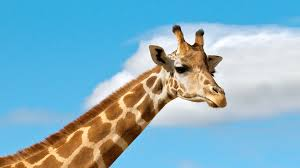
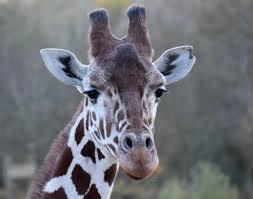
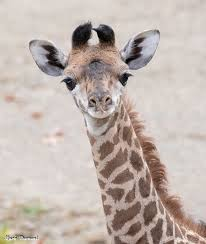
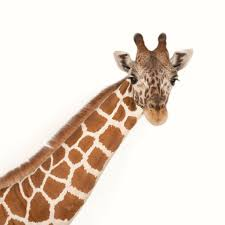
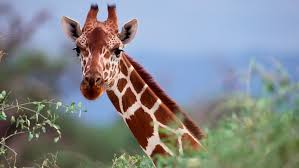
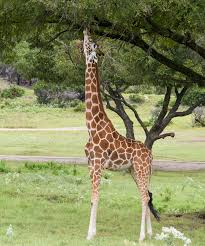
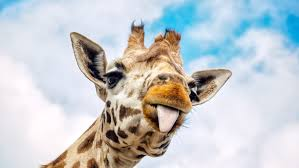
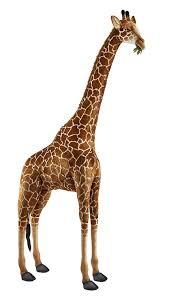

In [0]:
rawHtml

## Get Image Urllist

In [0]:
imageURLList = imgScrapper.getimageUrlList(rawHtml)

there are total 100 images


In [0]:
imageURLList 

[('https://animals.sandiegozoo.org/sites/default/files/2016-11/animals_hero_giraffe_1_0.jpg',
  'jpg'),
 ('https://img-s-msn-com.akamaized.net/tenant/amp/entityid/BBYrZCe.img?h=552&w=750&m=6&q=60&u=t&o=f&l=f',
  'img'),
 ('https://dynaimage.cdn.cnn.com/cnn/c_fill,g_auto,w_1200,h_675,ar_16:9/https%3A%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F191222200646-phoenix-zoo-giraffe-dies-trnd.jpg',
  'jpg'),
 ('https://theanimaladventurepark.com/wp-content/uploads/giraffes-5.jpg',
  'jpg'),
 ('https://a-z-animals.com/media/animals/images/470x370/giraffe_10.jpg',
  'jpg'),
 ('https://upload.wikimedia.org/wikipedia/commons/c/c7/Rothschild%27s_Giraffe_%28Giraffa_camelopardalis_rothschildi%29_male_%287068054987%29%2C_crop_%26_edit.jpg',
  'jpg'),
 ('https://www.cmzoo.org/wp-content/uploads/minnkeeperswithgiraffe-3-400x600.jpg',
  'jpg'),
 ('https://images.immediate.co.uk/production/volatile/sites/23/2018/09/Giraffes_Masai-Mara_Manoj-Shah_getty_623-19fe90d.jpg?quality=90&resize=614%2C409',
  'jpg')

##Store the Images retrieved

In [0]:
masterListOfImages = imgScrapper.downloadImagesFromURL(imageURLList,keyWord, header)

Image write failed:   HTTP Error 403: Forbidden


## HTML scrapper

In [0]:
from bs4 import BeautifulSoup as bs
import os
import json
import urllib.request
import urllib.parse
import urllib.error
from urllib.request import urlretrieve
from urllib.request import urlopen as uReq
import requests

<a class="_3fVaIS" href="/search?q=barbie+doll&amp;page=2"><span>Next</span></a>*italicized text*

In [2]:
searchString = "Barbie+Doll"
flipkart_url = "https://www.flipkart.com/search?q=" + searchString # preparing the URL to search the product on flipkart
print(flipkart_url)

https://www.flipkart.com/search?q=Barbie+Doll


In [0]:
uClient = uReq(flipkart_url) # requesting the webpage from the internet
flipkartPage = uClient.read() # reading the webpage
uClient.close() # closing the connection to the web server

In [6]:
print(flipkartPage)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<link href="https://rukminim1.flixcart.com" rel="dns-prefetch" />\n\t<link href="https://img1a.flixcart.com" rel="dns-prefetch" />\n\t<link rel="stylesheet" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.2329d4.css" />\n\n\t<link rel="preload" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/fk-logo_9fddff.png" as="image">\n\n\t<meta http-equiv="Content-type" content="text/html; charset=utf-8"/>\n\t<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n\t<meta property="fb:page_id" content="102988293558"/>\n\t<meta property="fb:admins" content="658873552,624500995,100000233612389"/>\n\t<meta name="robots" content="noodp" />\n\n\t<link rel=\'shortcut icon\' href="https://img1a.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" />\n\n\t<link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/>\n\n\t<meta property="og:type" content="website"/>\n\t<meta name="og_site_name" prop

In [7]:
flipkart_html = bs(flipkartPage, "html.parser")
print(flipkart_html)

<!DOCTYPE html>

<html lang="en">
<head>
<link href="https://rukminim1.flixcart.com" rel="dns-prefetch"/>
<link href="https://img1a.flixcart.com" rel="dns-prefetch"/>
<link href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.2329d4.css" rel="stylesheet"/>
<link as="image" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/fk-logo_9fddff.png" rel="preload"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="102988293558" property="fb:page_id"/>
<meta content="658873552,624500995,100000233612389" property="fb:admins"/>
<meta content="noodp" name="robots"/>
<link href="https://img1a.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon">
<link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
<meta content="website" property="og:type"/>
<meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
<!-- Appple Tou

<div class="_2zg3yZ"><span>Page 2 of 18</span><nav class="_1ypTlJ"><a class="_3fVaIS" href="/search?q=barbie+doll&amp;page=1"><span>Previous</span></a><a class="_2Xp0TH" href="/search?q=barbie+doll&amp;page=1">1</a><a class="_2Xp0TH fyt9Eu" href="/search?q=barbie+doll&amp;page=2">2</a><a class="_2Xp0TH" href="/search?q=barbie+doll&amp;page=3">3</a><a class="_2Xp0TH" href="/search?q=barbie+doll&amp;page=4">4</a><a class="_2Xp0TH" href="/search?q=barbie+doll&amp;page=5">5</a><a class="_2Xp0TH" href="/search?q=barbie+doll&amp;page=6">6</a><a class="_2Xp0TH" href="/search?q=barbie+doll&amp;page=7">7</a><a class="_2Xp0TH" href="/search?q=barbie+doll&amp;page=8">8</a><a class="_2Xp0TH" href="/search?q=barbie+doll&amp;page=9">9</a><a class="_2Xp0TH" href="/search?q=barbie+doll&amp;page=10">10</a><a class="_3fVaIS" href="/search?q=barbie+doll&amp;page=3"><span>Next</span></a></nav><span class="_293mUA"></span></div>

In [0]:
bigboxes = flipkart_html.findAll("div", {"class": "bhgxx2 col-12-12"})
bigbox = flipkart_html.findAll("a", {"class": "_3fVaIS"})

In [41]:
bigboxes

[<div class="bhgxx2 col-12-12"><div class="_1YuAuf"><section class="xeGmCJ D_NGuZ"><div class="_1iMC4O"><div class="D0YrLF"><span>Filters</span></div></div></section><div class="_1AsMpB"><section class="_3aoPnm"><div class="_1-5MDT"><span>CATEGORIES</span></div><div><div class="sUG0yY"><span><svg class="_3OIXYL" height="10" viewbox="0 0 16 27" width="10" xmlns="http://www.w3.org/2000/svg"><path class="zTtNVt" d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff"></path></svg></span><a class="_3O_Sek _32ZSYo" href="/toys/pr?sid=mgl&amp;q=Barbie+Doll&amp;otracker=categorytree" title="Toys">Toys</a></div></div><div><div class="sUG0yY"><span><svg class="_3OIXYL _3J6OLT" height="10" viewbox="0 0 16 27" width="10" xmlns="http://www.w3.org/2000/svg"><path class="_2z277k" d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff"></path></svg></span><a class="_3XS1AH _32ZSYo" href="/toys/dolls-doll-houses/pr?sid=mgl,fnw&amp;q=Barbie+Doll&amp;otr

In [47]:
product_links = []
for i in range(1,len(bigboxes)):
  try:
    link = "https://www.flipkart.com"+bigboxes[i].div.div.div.a['href']
    product_links.append(link)
    print("https://www.flipkart.com"+bigboxes[i].div.div.div.a['href'])
  except Exception as e:
    break

https://www.flipkart.com/barbie-glitz-doll-black-white-stripe-ruffle-dress/p/itmfef5qnastnwuh?pid=DDHFEE9GA3WKGVKZ&lid=LSTDDHFEE9GA3WKGVKZDKOTRX&marketplace=FLIPKART&srno=s_1_1&otracker=search&fm=organic&iid=0b51d8fd-f26d-468f-828d-5f708609e4b9.DDHFEE9GA3WKGVKZ.SEARCH&ssid=2b9pnzg6nk0000001579955037056&qH=75f0c3f6a29bc84b
https://www.flipkart.com/barbie-salon-doll-accessories-blonde/p/itm059ce7f3f37ad?pid=DDHF6ZZERDN6E4KT&lid=LSTDDHF6ZZERDN6E4KTAVZLMO&marketplace=FLIPKART&spotlightTagId=TrendingId_mgl%2Ffnw&srno=s_1_5&otracker=search&fm=organic&iid=2439c513-d7e5-40ea-8bcb-943700bfa17c.DDHF6ZZERDN6E4KT.SEARCH&ssid=2b9pnzg6nk0000001579955037056&qH=75f0c3f6a29bc84b
https://www.flipkart.com/barbie-long-hair-play-princess-doll-1/p/itm34ab952fb9ef7?pid=DDHFD4GKGPSNKRJR&lid=LSTDDHFD4GKGPSNKRJRUDRUCO&marketplace=FLIPKART&srno=s_1_9&otracker=search&fm=organic&iid=ef0dad90-4134-46e1-870d-1972bc0a2b7b.DDHFD4GKGPSNKRJR.SEARCH&ssid=2b9pnzg6nk0000001579955037056&qH=75f0c3f6a29bc84b
https://www.flipk

In [0]:
comments = []
name_ = []
rating_ = []
comment = []
custcom = []

for urls in product_links:
  prodRes = requests.get(urls) # getting the product page from server
  prod_html = bs(prodRes.text, "html.parser") # parsing the product page as HTML
  commentboxes = prod_html.find_all('div', {'class': "_3nrCtb"}) # finding the HTML section containing the customer comme
  comments.append(commentboxes)
  for commentbox in commentboxes:
    try:
      name = commentbox.div.div.find_all('p', {'class': '_3LYOAd _3sxSiS'})[0].text

    except:
      name = 'No Name'
    name_.append(name)
    try:
      rating = commentbox.div.div.div.div.text

    except:
      rating = 'No Rating'
    rating_.append(rating)
    try:
      commentHead = commentbox.div.div.div.p.text
    except:
      commentHead = 'No Comment Heading'
    comment.append(commentHead)
    try:
      comtag = commentbox.div.div.find_all('div', {'class': ''})
      custComment = comtag[0].div.text
    except:
      custComment = 'No Customer Comment'
    custcom.append(custComment)
mydict = {"Product": product_links, 
          "Name": name_, 
          "Rating": rating_, 
          "CommentHead": comment,
          "Comment": custcom}

In [54]:
for k,v in mydict.items():
  print(f"{k} : {v}")

Product : ['https://www.flipkart.com/barbie-glitz-doll-black-white-stripe-ruffle-dress/p/itmfef5qnastnwuh?pid=DDHFEE9GA3WKGVKZ&lid=LSTDDHFEE9GA3WKGVKZDKOTRX&marketplace=FLIPKART&srno=s_1_1&otracker=search&fm=organic&iid=0b51d8fd-f26d-468f-828d-5f708609e4b9.DDHFEE9GA3WKGVKZ.SEARCH&ssid=2b9pnzg6nk0000001579955037056&qH=75f0c3f6a29bc84b', 'https://www.flipkart.com/barbie-salon-doll-accessories-blonde/p/itm059ce7f3f37ad?pid=DDHF6ZZERDN6E4KT&lid=LSTDDHF6ZZERDN6E4KTAVZLMO&marketplace=FLIPKART&spotlightTagId=TrendingId_mgl%2Ffnw&srno=s_1_5&otracker=search&fm=organic&iid=2439c513-d7e5-40ea-8bcb-943700bfa17c.DDHF6ZZERDN6E4KT.SEARCH&ssid=2b9pnzg6nk0000001579955037056&qH=75f0c3f6a29bc84b', 'https://www.flipkart.com/barbie-long-hair-play-princess-doll-1/p/itm34ab952fb9ef7?pid=DDHFD4GKGPSNKRJR&lid=LSTDDHFD4GKGPSNKRJRUDRUCO&marketplace=FLIPKART&srno=s_1_9&otracker=search&fm=organic&iid=ef0dad90-4134-46e1-870d-1972bc0a2b7b.DDHFD4GKGPSNKRJR.SEARCH&ssid=2b9pnzg6nk0000001579955037056&qH=75f0c3f6a29bc84b

##Next page code/result

In [42]:
bigbox

[<a class="_3fVaIS" href="/search?q=Barbie+Doll&amp;page=2"><span>Next</span></a>]

## Number of product reviews webpage

In [0]:
bigboxes = flipkart_html.findAll("a",{"class":"Zhf2z-"})
bigbox = flipkart_html.findAll("a", {"class": "_3fVaIS"})

In [36]:
print(len(bigboxes))

40


In [17]:
bigboxes[1]

<div class="bhgxx2 col-12-12"><div class="_3O0U0u"><div data-id="DDHFEE9GA3WKGVKZ" style="width:25%"><div class="_3liAhj"><a class="Zhf2z-" href="/barbie-glitz-doll-black-white-stripe-ruffle-dress/p/itmfef5qnastnwuh?pid=DDHFEE9GA3WKGVKZ&amp;lid=LSTDDHFEE9GA3WKGVKZDKOTRX&amp;marketplace=FLIPKART&amp;srno=s_1_1&amp;otracker=search&amp;fm=organic&amp;iid=0b51d8fd-f26d-468f-828d-5f708609e4b9.DDHFEE9GA3WKGVKZ.SEARCH&amp;ssid=2b9pnzg6nk0000001579955037056&amp;qH=75f0c3f6a29bc84b" rel="noopener noreferrer" target="_blank"><div><div><div class="_3BTv9X" style="height:280px;width:200px"><img alt="Barbie GLITZ DOLL (BLACK-WHITE STRIPE RUFFLE DRESS)" class="_1Nyybr" src="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/placeholder_9951d0.svg"/></div></div></div><div class="_3gDSOa _3iGnbq"><div class="DsQ2eg"><svg class="_2oLiqr" height="16" viewbox="0 0 20 16" width="16" xmlns="http://www.w3.org/2000/svg"><path class="_35Y7Yo" d="M8.695 16.682C4.06 12.382 1 9.536 1 6.065 1 3.219 3.178 1 5.95 1c1

In [39]:
for i in range(1,len(bigboxes)):
  print("https://www.flipkart.com"+bigboxes[i]['href'])


https://www.flipkart.com/barbie-deluxe-hair/p/itmegnrgbghqqxnz?pid=DDHEGNRGP5HVFZXP&lid=LSTDDHEGNRGP5HVFZXPIKETUQ&marketplace=FLIPKART&srno=s_1_2&otracker=search&fm=organic&iid=e37dfd86-c794-4d08-9826-90a8b54d2a1a.DDHEGNRGP5HVFZXP.SEARCH&ssid=2b9pnzg6nk0000001579955037056&qH=75f0c3f6a29bc84b
https://www.flipkart.com/barbie-doll-accessories/p/itmf3s4gunzag6cs?pid=DDHF3RCZ6U9DBUH7&lid=LSTDDHF3RCZ6U9DBUH7ARB6G9&marketplace=FLIPKART&srno=s_1_3&otracker=search&fm=organic&iid=f63541de-65d0-4f6a-bf2e-b45fb05c4b5f.DDHF3RCZ6U9DBUH7.SEARCH&ssid=2b9pnzg6nk0000001579955037056&qH=75f0c3f6a29bc84b
https://www.flipkart.com/amaze-sport-sweet-happy-girl-doll-dresses-set-kids-multicolor/p/itmfgkxzphcc27xg?pid=DDHFGJWRG86KDUFZ&lid=LSTDDHFGJWRG86KDUFZ5KUBOB&marketplace=FLIPKART&spotlightTagId=BestsellerId_mgl%2Ffnw&srno=s_1_4&otracker=search&fm=organic&iid=fe0214d3-7350-40de-a1d4-f92c12082976.DDHFGJWRG86KDUFZ.SEARCH&ssid=2b9pnzg6nk0000001579955037056&qH=75f0c3f6a29bc84b
https://www.flipkart.com/barbie-sal

## Retrieve Product 1 link in webpage 1

In [18]:
box = bigboxes[1] #  taking the first iteration (for demo)
productLink = "https://www.flipkart.com" + box.div.div.div.a['href'] # extracting the actual product link
print(productLink)

https://www.flipkart.com/barbie-glitz-doll-black-white-stripe-ruffle-dress/p/itmfef5qnastnwuh?pid=DDHFEE9GA3WKGVKZ&lid=LSTDDHFEE9GA3WKGVKZDKOTRX&marketplace=FLIPKART&srno=s_1_1&otracker=search&fm=organic&iid=0b51d8fd-f26d-468f-828d-5f708609e4b9.DDHFEE9GA3WKGVKZ.SEARCH&ssid=2b9pnzg6nk0000001579955037056&qH=75f0c3f6a29bc84b


##Nextpage retrieve url

In [20]:
npage = bigbox[0] #  taking the first iteration (for demo)
productnextLink = "https://www.flipkart.com" + npage['href'] # extracting the actual product link
print(productnextLink)

https://www.flipkart.com/search?q=Barbie+Doll&page=2
